<a href="_index.ipynb">&larr; FIL </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# Filterentwurfsmethoden
 
Demonstriere verschiedene Filterentwurfsmethoden und vergleiche die Ergebnisse

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties

import numpy as np
import scipy.signal as sig

%matplotlib inline   
import matplotlib.pyplot as plt

c:\Users\Chris\.pyenv\pyenv-win\versions\3.8.2\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
c:\Users\Chris\.pyenv\pyenv-win\versions\3.8.2\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
c:\Users\Chris\.pyenv\pyenv-win\versions\3.8.2\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In der nächsten Zelle werden die Filterspezifikationen gewählt

In [2]:
f_S = 400 # Samplingfrequenz
f_DB = 40 # Grenzfreq. Durchlassband (DB)
f_SB = 50 # Grenzfrequenz Sperrband (SB)
F_DB = f_DB/(f_S/2) # Frequenzen bezogen
F_SB = f_SB/(f_S/2) # auf HALBE Abtastfreq.
#
A_DB = 0.1 # max. Ripple im DB in dB
A_DB_lin = (10**(A_DB/20.0)-1) / \
  (10**(A_DB/20.0)+1)*2 # und linear
A_SB = 60 # min. Dämpfung im SB in dB
A_SB_lin = 10**(-A_SB/20.0) # und linear
#
L = 44 # Manuelle Vorgabe Filterordnung

Jetzt können Sie ein Filterentwurfverfahren aktivieren:

In [3]:
############## FIR-Filterentwurf ##########
a = [1] # Nennerpolynom = 1 bei FIR-Filtern
#=== Windowed FIR / Least Square =========
F_c  = f_DB / (f_S/2)  # -6dB - Frequenz
b = sig.firwin(L, F_c) # Hamming-Window
#=== Frequency Sampling ==================
b = sig.firwin2(L, [0, F_DB, F_SB, 1],
           [1, 1, 0, 0])
#=== REMEZ / Parks-McClellan / Equiripple
W_DB = 1;  W_SB = 1 # manuelle Ordnung:
b = sig.remez(L, [0, F_DB, F_SB, 1],
            [0, 1], [W_DB, W_SB], Hz = 2)
# minimale Ordnung:
(L_min,F,A,W) = dsp.remezord([F_DB, F_SB],
    [1, 0], [A_DB_lin, A_SB_lin], Hz = 2)
b = sig.remez(L_min, F, A, W )

In [4]:
##############  IIR-Filterentwurf  ########
#=== Butterworth Filter===================
[Lb,F_b] = sig.buttord(F_DB,F_SB,A_DB,A_SB)
#[b, a] = sig.butter(Lb, F_b)
#=== IIR-Wrapper (nur Python) =====
#[b, a] = sig.iirdesign(F_DB, F_SB,
#              A_DB, A_SB, ftype='ellip')
############################################
print('Filterkoeffizienten:')
print('a = ', a); print('b = ', b)

Filterkoeffizienten:
a =  [1]
b =  [-5.49763008e-04 -3.60953595e-05  4.12504010e-04  1.09454932e-03
  1.77191538e-03  2.12020779e-03  1.86944985e-03  9.61710290e-04
 -3.58726117e-04 -1.58957933e-03 -2.16159438e-03 -1.70971010e-03
 -2.99181994e-04  1.52195702e-03  2.90639716e-03  3.07871420e-03
  1.73932880e-03 -6.99832961e-04 -3.20008141e-03 -4.51556673e-03
 -3.78964057e-03 -1.05233435e-03  2.64981116e-03  5.61557586e-03
  6.24210322e-03  3.84812196e-03 -8.40162385e-04 -5.83524934e-03
 -8.68387730e-03 -7.63020514e-03 -2.59422595e-03  4.52522868e-03
  1.04936841e-02  1.21418851e-02  7.95148091e-03 -9.31255533e-04
 -1.08355989e-02 -1.69678513e-02 -1.55858231e-02 -6.01596209e-03
  8.47816159e-03  2.15693492e-02  2.63495682e-02  1.85296166e-02
 -9.84893788e-04 -2.53814841e-02 -4.36741506e-02 -4.44787514e-02
 -2.05170650e-02  2.79005229e-02  9.19022885e-02  1.56194407e-01
  2.03717931e-01  2.21220658e-01  2.03717931e-01  1.56194407e-01
  9.19022885e-02  2.79005229e-02 -2.05170650e-02 -4.447

Im Folgenden werden die Filterentwürfe in der Frequenzebene dargestellt

Text(0.5, 1.0, 'Group Delay $ \\tau_g$')

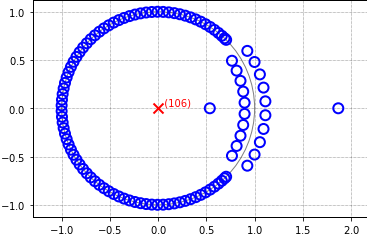

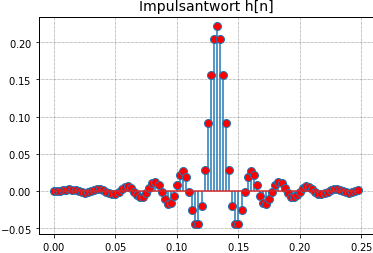

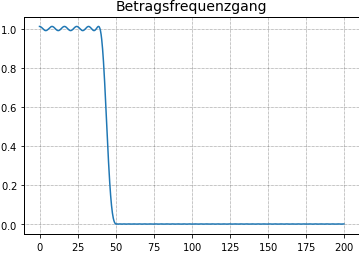

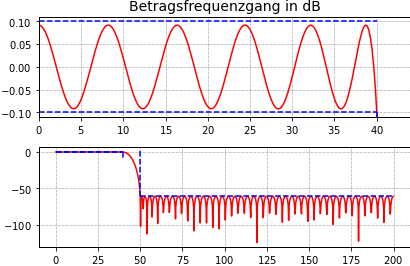

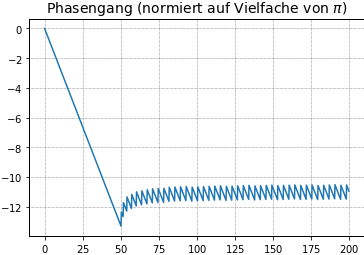

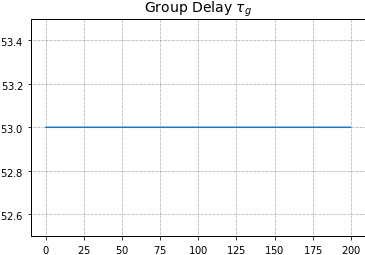

In [5]:
## Calculate H(w), w = 0 ... pi, 1024 Pts.
[w, H] = sig.freqz(b, a, 1024)
# Translate w to physical frequencies:
f = w / (2 * np.pi) * f_S
############## Plot the Results #########
## Pol/Nullstellenplan
fig1, ax1 = plt.subplots(1)
[z, p, k] = dsp.zplane(b, a, plt_ax = ax1)
## ----- Impulsantwort -----
fig2, ax2 = plt.subplots(1); ax2.grid(True)
[h, td] = dsp.impz(b, a, f_S)  #Impulsantwort / Koeffizienten
[ml, sl, bl] = ax2.stem(td, h, use_line_collection=True)
plt.setp(ml, 'markerfacecolor', 'r', 'markersize', 8)
ax2.set_title(r'Impulsantwort h[n]')
## ----- Linear frequency plot -----
fig3, ax3 = plt.subplots(1); ax3.grid(True)
ax3.plot(f, np.abs(H))
ax3.set_title(r'Betragsfrequenzgang')
## Log. Frequenzgang mit Spezifikationen
fig4, (ax41,ax42) = plt.subplots(2,1)
ax41.plot(f,20 * np.log10(abs(H)), 'r'); ax41.grid(True)
ax41.plot([0, f_DB],[-A_DB, -A_DB],'b--') # untere Spec-Grenze
ax41.plot([f_DB, f_DB], [ -A_DB, -A_DB-10], 'b--') #@ F_DB
if len(a) == 1:
    ax41.plot([0, f_DB],[A_DB, A_DB], 'b--') # obere Spec-Grenze
    ax41.axis([0, f_DB * 1.1, -A_DB*1.1, A_DB * 1.1])
else:
    ax41.plot([0, f_DB], [0, 0], 'b--') # obere Spec-Grenze
    ax41.axis([0, f_DB * 1.1, -A_DB * 1.1, A_DB * 0.1])
ax41.set_title(r'Betragsfrequenzgang in dB')
#

ax42.plot(f,20 * np.log10(np.abs(H)), 'r'); ax42.grid(True)
ax42.plot([0,  f_DB],[-A_DB, -A_DB],'b--') # untere Grenze DB
if len(a) == 1:
    ax42.plot([0,  f_DB], [A_DB, A_DB],'b--') # obere Grenze DB
else:
    ax42.plot([0, f_DB], [0, 0], 'b--') # obere Grenze DB
ax42.plot([f_SB, f_S/2.], [-A_SB, -A_SB], 'b--') # obere Grenze SB
ax42.plot([f_DB, f_DB], [-A_DB, -A_DB-10], 'b--') # @ F_DB
ax42.plot([f_SB, f_SB],[1, -A_SB],'b--') # @ F_SB
fig4.set_tight_layout(True) # pad=1.2, h_pad=None, w_pad=None
#=========================================
## Phasengang
fig5, ax5 = plt.subplots(1); ax5.grid(True)
ax5.plot(f,np.unwrap(np.angle(H))/np.pi)
# Ohne unwrap wird Phase auf +/- pi umgebrochen
ax5.set_title(r'Phasengang (normiert auf Vielfache von $\pi$)')
## Groupdelay
fig6, ax6 = plt.subplots(1); ax6.grid(True)
[tau_g, w] = dsp.grpdelay(b, a, Fs = f_S)
ax6.plot(w, tau_g); ax6.grid(True)
ax6.set_ylim(max(min(tau_g)-0.5,0), (max(tau_g) + 0.5))
ax6.set_title(r'Group Delay $ \tau_g$') # (r: raw string)

### Experimente und Fragen

- Experimentieren Sie mit unterschiedlichen Filterentwürfen

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2021*.